In [ ]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

We chose task number 1, to analzye and predcit how a stock is going to change we need to use regression analysis


Mean Squared Error: 172.26
R² Score: -0.01


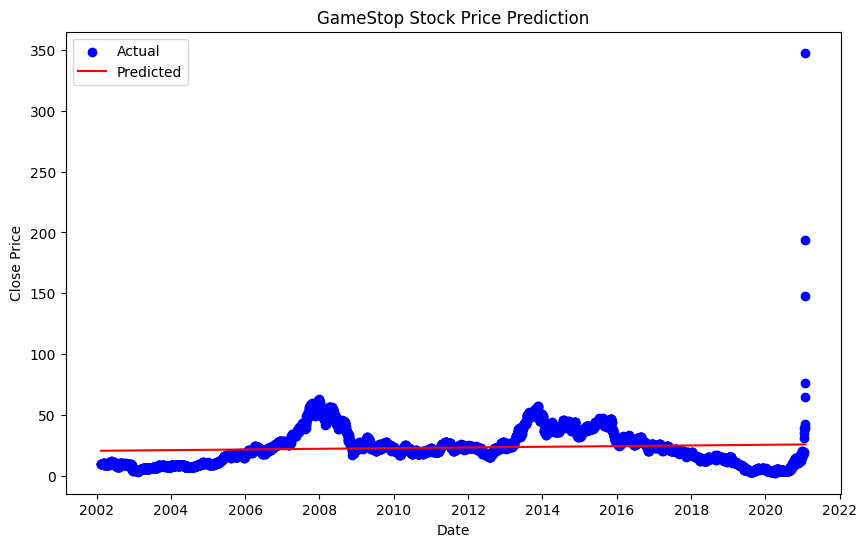

Confusion Matrix:
 [[172 324]
 [  0 459]]


In [9]:
# 📌 Step 2: Load and Prepare Data
df = pd.read_csv('GME_stock.csv')
df['date'] = pd.to_datetime(df['date'])
df['Date_ordinal'] = df['date'].map(pd.Timestamp.toordinal)


df_sorted = df.sort_values('date')

# 📌 Step 3: Define Features and Target
X = df[['Date_ordinal']]
y = df['close_price']

# 📌 Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 5: Train Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 📌 Step 6: Make Predictions
y_pred = model.predict(X_test)

# 📌 Step 7: Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# 📌 Step 8: Plot Results
# Sort the dataframe by date for plotting
df_sorted = df.sort_values('date').copy()
# Predict close price for all dates for smooth plotting
df_sorted['Predicted_Close'] = model.predict(df_sorted[['Date_ordinal']])

plt.figure(figsize=(10,6))
plt.scatter(df_sorted['date'], df_sorted['close_price'], color='blue', label='Actual')
plt.plot(df_sorted['date'], df_sorted['Predicted_Close'], color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('GameStop Stock Price Prediction')
plt.legend()
plt.show()

# 📌 Step 9: Confusion Matrix (Optional)
# Convert regression output to classification for confusion matrix
threshold = y.median()
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)
cm = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix:\n", cm)


Mean Squared Error: 208.96
R² Score: 0.01


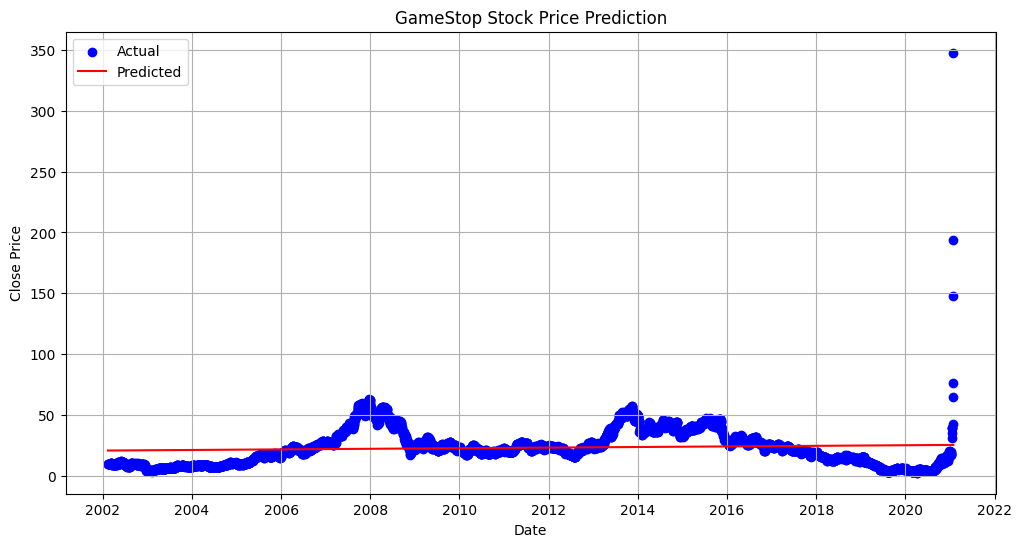

Confusion Matrix:
 [[ 775 1612]
 [   0 2386]]


In [11]:
# 📌 Step 2: Load and Prepare Data
df = pd.read_csv('GME_stock.csv')
df['date'] = pd.to_datetime(df['date'])
df['Date_ordinal'] = df['date'].map(pd.Timestamp.toordinal)


# 📌 Step 4: Define Features and Target
X = df_sorted[['Date_ordinal']]
y = df_sorted['close_price']


# 📌 Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 5: Train on All Data
model = LinearRegression()
model.fit(X_train, y_train)

# 📌 Step 6: Predict on All Data
y_pred = model.predict(X)

# 📌 Step 7: Accuracy Metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# 📌 Step 8: Plot Actual vs Predicted
plt.figure(figsize=(12,6))
plt.scatter(df_sorted['date'], df_sorted['close_price'], color='blue', label='Actual')
plt.plot(df_sorted['date'], df_sorted['Predicted_Close'], color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('GameStop Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

# 📌 Step 9: Confusion Matrix (Discretized)
threshold = y.median()
y_class = (y > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)
cm = confusion_matrix(y_class, y_pred_class)
print("Confusion Matrix:\n", cm)


Mean Squared Error: 116.54
R² Score: 0.04


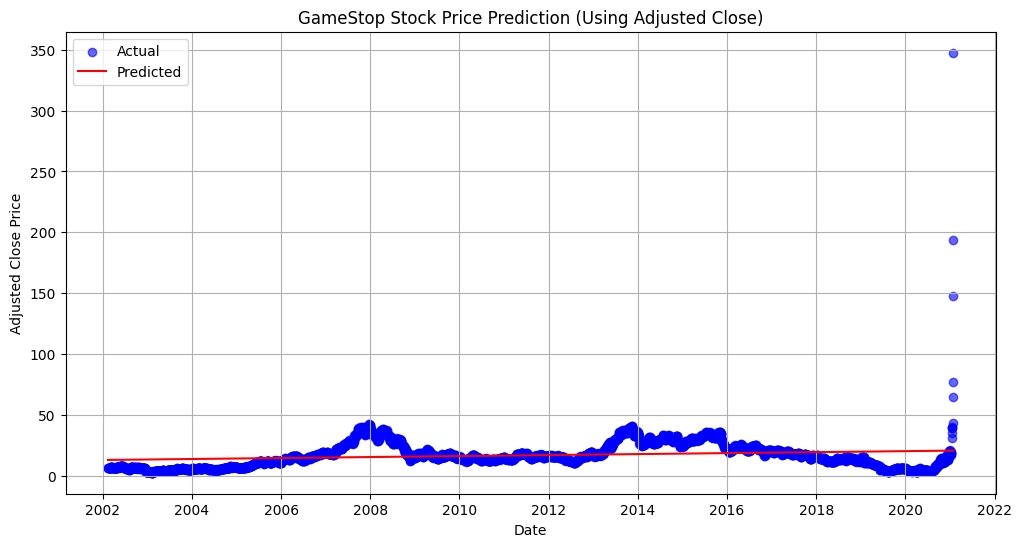

Confusion Matrix:
 [[1116 1271]
 [ 394 1992]]

Actual Adjusted Close Prices on 1st of Each Month in 2008 and 2021:


,date,adjclose_price
3270,2008-02-01,35.361721
3230,2008-04-01,37.482624
3208,2008-05-01,37.967396
3166,2008-07-01,27.436975
3144,2008-08-01,26.817549
3102,2008-10-01,24.265736
3060,2008-12-01,13.028357


,date,adjclose_price
208,2020-04-01,3.25
187,2020-05-01,6.05
167,2020-06-01,4.13
145,2020-07-01,4.44
102,2020-09-01,7.65
81,2020-10-01,9.77
39,2020-12-01,15.80


In [12]:
# 📌 Step 2: Load and Prepare Data
df = pd.read_csv('GME_stock.csv')
df.dropna(inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['Date_ordinal'] = df['date'].map(pd.Timestamp.toordinal)

# 📌 Step 3: Sort Chronologically
df_sorted = df.sort_values('date')

# 📌 Step 4: Define Features and Target
X = df_sorted[['Date_ordinal']]
y = df_sorted['adjclose_price']  # ✅ Use adjusted close price

# 📌 Step 5: Train on All Data
model = LinearRegression()
model.fit(X, y)

# 📌 Step 6: Predict on All Data
y_pred = model.predict(X)
df_sorted['Predicted_AdjClose'] = y_pred

# 📌 Step 7: Accuracy Metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# 📌 Step 8: Plot Actual vs Predicted
plt.figure(figsize=(12,6))
plt.scatter(df_sorted['date'], df_sorted['adjclose_price'], label='Actual', color='blue', alpha=0.6)
plt.plot(df_sorted['date'], df_sorted['Predicted_AdjClose'], label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('GameStop Stock Price Prediction (Using Adjusted Close)')
plt.legend()
plt.grid(True)
plt.show()

# 📌 Step 9: Confusion Matrix (Discretized)
threshold = y.median()
y_class = (y > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)
cm = confusion_matrix(y_class, y_pred_class)
print("Confusion Matrix:\n", cm)

# 📌 Step 10: Print Actual Prices on 1st of Each Month in 2008
monthly_check08 = df_sorted[(df_sorted['date'].dt.day == 1) & (df_sorted['date'].dt.year.isin([2008]))]
monthly_check20 = df_sorted[(df_sorted['date'].dt.day == 1) & (df_sorted['date'].dt.year.isin([2020]))]
print("\nActual Adjusted Close Prices on 1st of Each Month in 2008 and 2021:")
display(monthly_check08[['date', 'adjclose_price']])
display(monthly_check20[['date', 'adjclose_price']])
